In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Zarqa Ayub\Instacart Basket Analysis'

In [3]:
# import updated dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
# check the tyoe of data
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'Busiest days', 'Busiest_period_of_day',
       'max_order', 'loyalty_flag', 'mean_price', 'spending_flag',
       'median_days_since_prior_order', 'Order frequency', 'First Name',
       'Last_name', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income'],
      dtype='object')

In [5]:
# drop the PII columns
df = df.drop(columns = ['First Name', 'Last_name','_merge'])  

In [6]:
# check output
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'Busiest days', 'Busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_price', 'spending_flag',
       'median_days_since_prior_order', 'Order frequency', 'Gender', 'STATE',
       'Age', 'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

### Step 3: Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [7]:
# insert empty column
region = []

In [8]:
# check output
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'Busiest days', 'Busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_price', 'spending_flag',
       'median_days_since_prior_order', 'Order frequency', 'Gender', 'STATE',
       'Age', 'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

In [10]:
# show output of state column
df['STATE']

0           Minnesota
1           Minnesota
2           Minnesota
3           Minnesota
4           Minnesota
              ...    
32642456      Vermont
32642457      Vermont
32642458      Vermont
32642459      Vermont
32642460      Vermont
Name: STATE, Length: 32642461, dtype: object

In [11]:
# assign conditions

for value in df['STATE']: 
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennyslvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columnbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append('South')
    else: 
        region.append('West')

In [12]:
# add list as column 
df['region'] = region

In [13]:
# check dataframe output
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,median_days_since_prior_order,Order frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region
0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138.0,28.0,6.0,11.0,...,8.0,Frequent customer,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Midwest
1,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138.0,30.0,6.0,17.0,...,8.0,Frequent customer,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Midwest
2,907.0,Premium Sliced Bacon,106.0,12.0,20.0,3160996.0,138.0,1.0,5.0,13.0,...,8.0,Frequent customer,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Midwest
3,907.0,Premium Sliced Bacon,106.0,12.0,20.0,2254091.0,138.0,10.0,5.0,14.0,...,8.0,Frequent customer,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Midwest
4,1000.0,Apricots,18.0,10.0,12.9,505689.0,138.0,9.0,6.0,12.0,...,8.0,Frequent customer,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Midwest


### Part II: Determine the difference in spending habits between different U.S regions

In [14]:
# Creating a crosstab between 'region' and 'spending_flag'
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [15]:
# check output
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,157414,7495381
Northeast,98673,4994569
South,199251,10053486
West,185584,9458092


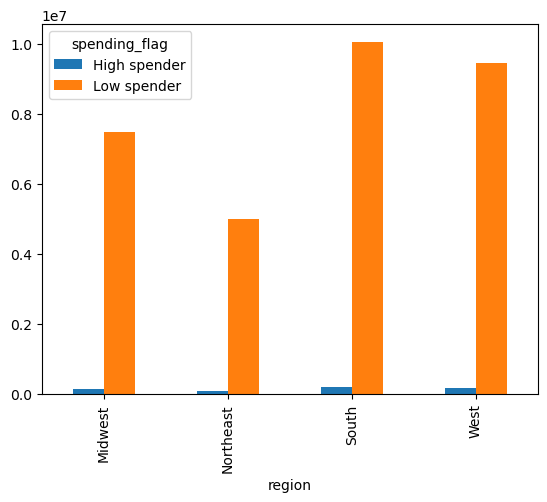

In [16]:
# Creating a stacked bar chart
region_spending_bar = crosstab.plot.bar()

From the results in the bar we can see that the best performing region is the South and the worst performing is the Northeast.

### Step 4: Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [17]:
# Creating the exclusion flag
df.loc[df['max_order'] < 5, 'order_flag'] = 'Low-activity customer'
df.loc[df['max_order'] >= 5, 'order_flag'] = 'High-activity customer'

In [18]:
# Creating a sample with only high-activity customers
df_high_activity = df[df['order_flag'] == 'High-activity customer']

In [19]:
# Exporting the sample 
df_high_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_activity_customers.pkl'))

### Step 5: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database.

#### Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
To achieve this, we will deal with each variable in turn and set conditions.

In [20]:
# Age variable. 

df.loc[df['Age'] <= 35, 'Age_profile'] = 'Young'
df.loc[(df['Age'] > 35) & (df['Age'] < 65), 'Age_profile'] = 'Middle-aged'
df.loc[df['Age'] >= 65, 'Age_profile'] = 'Old'

In [21]:
# Frequency distribution for 'age_profile'

df['Age_profile'].value_counts(dropna = False)

Age_profile
Middle-aged    14791280
Young           9213355
Old             8637815
NaN                  11
Name: count, dtype: int64

### Income Variable

In [22]:
# check income range
df['income'].describe()

count    3.264245e+07
mean     9.940504e+04
std      4.305326e+04
min      2.590300e+04
25%      6.697900e+04
50%      9.659500e+04
75%      1.278650e+05
max      5.939010e+05
Name: income, dtype: float64

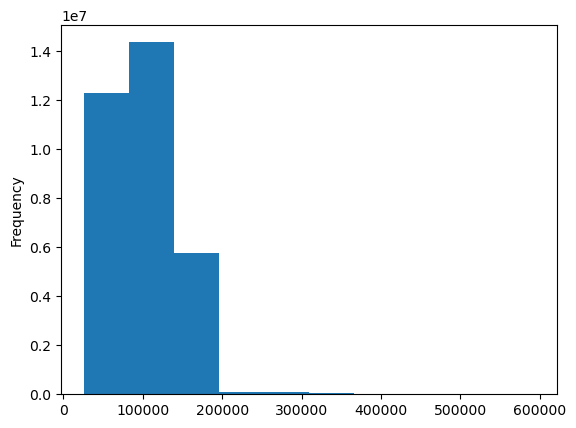

In [23]:
# check using chart. 
hist_income = df['income'].plot.hist(bins = 10)

In [24]:
df['income'].max()

593901.0

In [25]:
# Creating the income_profile

df.loc[df['income'] < 100000, 'income_profile'] = 'Low earner'
df.loc[(df['income'] >= 100000) & (df['income'] < 200000), 'income_profile'] = 'Average earner'
df.loc[df['income'] >= 200000, 'income_profile'] = 'High earner'

In [26]:
# check income_profile variable 
df['income_profile'].value_counts(dropna = False)

income_profile
Low earner        17726930
Average earner    14655868
High earner         259652
NaN                     11
Name: count, dtype: int64

## Goods

In [27]:
#import departments_wrangled.csv as df_dep
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [28]:
# change heading name to dept_id
df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [29]:
# Create a data dictionary for departments
data_dict = df_dep.to_dict('index')

In [30]:
df_dep.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [31]:
# create data dict without the headings
data_dict = dict(zip(df_dep["department_id"], df_dep["department"]))

In [32]:
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

using the data dict we see that we can create the following customer profiles:

meat eater, vegan & vegeterian
kids & no kids has pet & no pet, drinks alcohol & does not drink

### Meat eater & non-meat eater

In [33]:
# create crosstab
diet_crosstab = pd.crosstab(df['department_id'], df['user_id'], dropna = False)

In [34]:
diet_dict = dict()
for user in diet_crosstab:
    diet_list = diet_crosstab[user].tolist()
    if diet_list[11] == 0 and diet_list[15] == 0:
        diet_dict[user] = 'Vegan'
    elif diet_list[11] == 0:
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Meat-eater'

In [35]:
df['diet_flag'] = df['user_id'].map(diet_dict)

In [36]:
# Checking frequency distribution for diet column
df['diet_flag'].value_counts(dropna = False)

diet_flag
Meat-eater    23898993
Vegetarian     8347245
Vegan           396212
NaN                 11
Name: count, dtype: int64

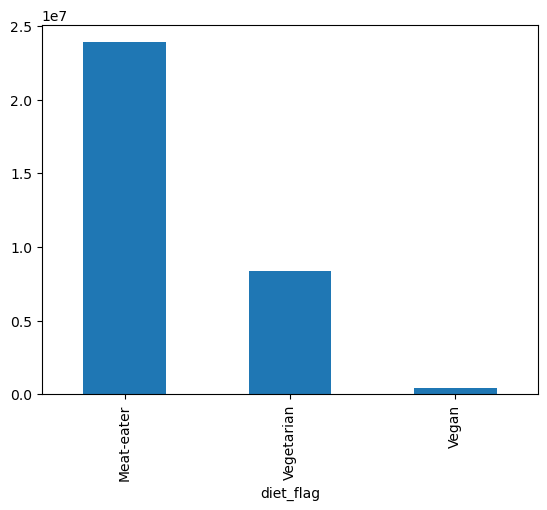

In [37]:
# Create a bar chart to visualize the diet profile

bar_diet_flag = df['diet_flag'].value_counts().plot.bar()

In [38]:
# Save bar graph as png
bar_diet_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_flag.png'))

### Fam Status

In [39]:
## create crosstab
family_crosstab = pd.crosstab(df['fam_status'], df['n_dependants'], dropna = False)

In [40]:
# check output
family_crosstab

n_dependants,0.0,1.0,2.0,3.0
fam_status,,,,
divorced/widowed,2792213,0,0,0
living with parents and siblings,0,533869,511818,516267
married,0,7606432,7638651,7678110
single,5365090,0,0,0


In [41]:
# assign flag conditions
df.loc[(df['n_dependants'] == 0), 'kids'] = 'No kids'
df.loc[(df['n_dependants'] >= 1), 'kids'] = 'Has kids'

In [42]:
# Check output/distribution

df['kids'].value_counts(dropna = False)

kids
Has kids    24485147
No kids      8157303
NaN               11
Name: count, dtype: int64

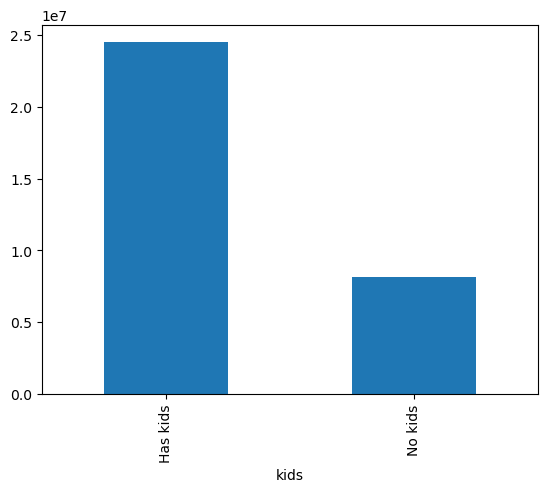

In [43]:
# Create a bar chart
bar_kids = df['kids'].value_counts().plot.bar()

In [44]:
# Save the visualization as png
bar_kids.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'kids_flag.png'))

### Pets & no pets
I'll use the diet_crosstab as it has the columns necessary for the pet profile.

In [45]:
# Assigning pet flags conditions

pet_dict = dict()
for user in diet_crosstab:
    workinglist = diet_crosstab[user].tolist()
    if workinglist[8] == 0 :
        pet_dict[user] = 'No pet'
    else:
        pet_dict[user] = 'Has pet'

In [46]:
# assigning user flags to the list
df['pet_flag'] = df['user_id'].map(pet_dict)

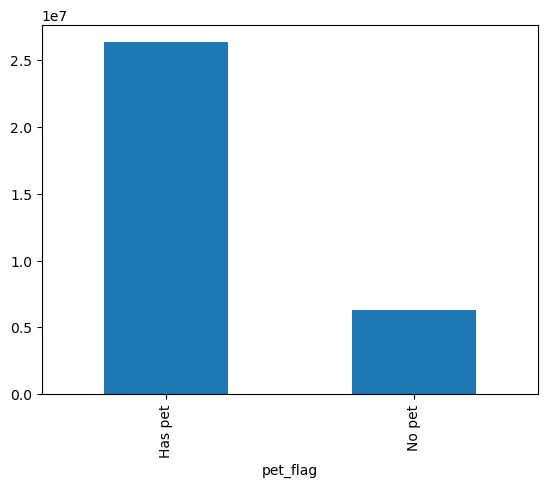

In [47]:
# Create a bar chart for pet profile
bar_pet_profile = df['pet_flag'].value_counts().plot.bar()

In [48]:
bar_pet_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_profile.png'))

### Drinks alcohol/does not drink.

In [49]:
# Assigning alcohol conditions

alcohol_dict = dict()
for user in diet_crosstab:
    workinglist = diet_crosstab[user].tolist()
    if workinglist[5] == 0 :
        alcohol_dict[user] = 'No alcohol'
    else:
        alcohol_dict[user] = 'Alcohol'

In [50]:
# assigning user flags to the list
df['alcohol_flag'] = df['user_id'].map(alcohol_dict)

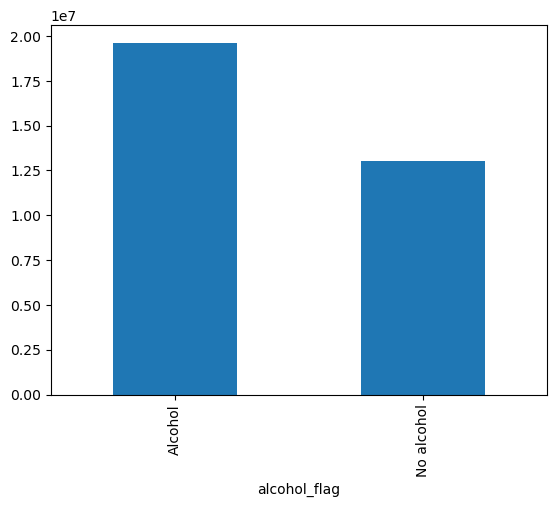

In [51]:
# Create a bar chart for drinking profile
bar_drinking_profile = df['alcohol_flag'].value_counts().plot.bar()

In [52]:
bar_drinking_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'drinking_profile.png'))

### Step 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [53]:
# check flag names
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'Busiest days', 'Busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_price', 'spending_flag',
       'median_days_since_prior_order', 'Order frequency', 'Gender', 'STATE',
       'Age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'order_flag', 'Age_profile', 'income_profile', 'diet_flag', 'kids',
       'pet_flag', 'alcohol_flag'],
      dtype='object')

In [54]:
# Aggregate income_profile 
df.groupby('income_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                 prices              
                                 mean   max  min        mean      max  min
income_profile                                                            
Average earner              10.897717  30.0  0.0   12.174818  99999.0  1.0
High earner                 10.113401  30.0  0.0  264.564517  99999.0  1.0
Low earner                  10.994732  30.0  0.0    8.111200  99999.0  1.0

In [57]:
# Aggregate kids profile 
df.groupby('kids').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                           mean   max  min       mean      max  min
kids                                                               
Has kids              10.951367  30.0  0.0  11.931538  99999.0  1.0
No kids               10.922538  30.0  0.0  12.130045  99999.0  1.0

In [58]:
# Aggregate pet_profile 
df.groupby('pet_flag').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                           mean   max  min       mean      max  min
pet_flag                                                           
Has pet               10.687085  30.0  0.0  11.793670  99999.0  1.0
No pet                12.016697  30.0  0.0  12.769774  99999.0  1.0

In [59]:
# Aggregate drinking_profile 
df.groupby('alcohol_flag').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                               mean   max  min       mean      max  min
alcohol_flag                                                           
Alcohol                   10.052979  30.0  0.0  11.561598  99999.0  1.0
No alcohol                12.289135  30.0  0.0  12.618213  99999.0  1.0

### Step 8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

## Age

In [60]:
# Create a crosstab to compare age profile and region
age_region_crosstab = pd.crosstab(df['Age_profile'], df['region'], normalize = 'columns')

In [61]:
# check output
age_region_crosstab

region,Midwest,Northeast,South,West
Age_profile,,,,
Middle-aged,0.459604,0.445078,0.450225,0.455334
Old,0.262031,0.271803,0.262909,0.264697
Young,0.278365,0.283119,0.286866,0.279969


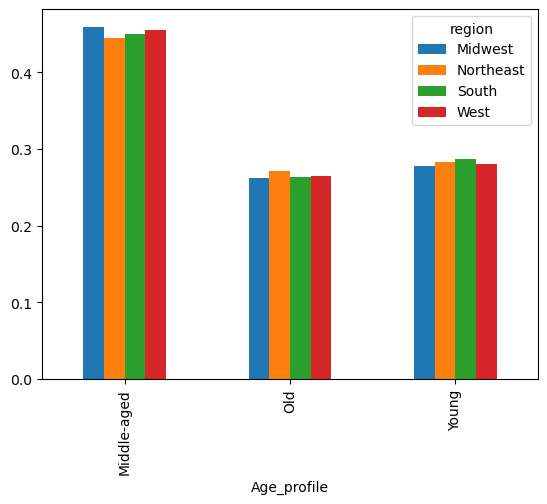

In [62]:
# Create a bar chart to see the relationship

bar_age_region = age_region_crosstab.plot.bar()

We see that there isn't a significance of the behaviour of different age groups across the regions in the USA.

In [63]:
# export age_region bar
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age & Region.png'))

## Income

In [64]:
# Create a crosstab to compare income profile and region
income_region_crosstab = pd.crosstab(df['income_profile'], df['region'], normalize = 'columns')

In [65]:
# check output
income_region_crosstab

region,Midwest,Northeast,South,West
income_profile,,,,
Average earner,0.457100,0.454000,0.441276,0.448082
High earner,0.008567,0.007121,0.007817,0.008054
Low earner,0.534333,0.538879,0.550907,0.543863


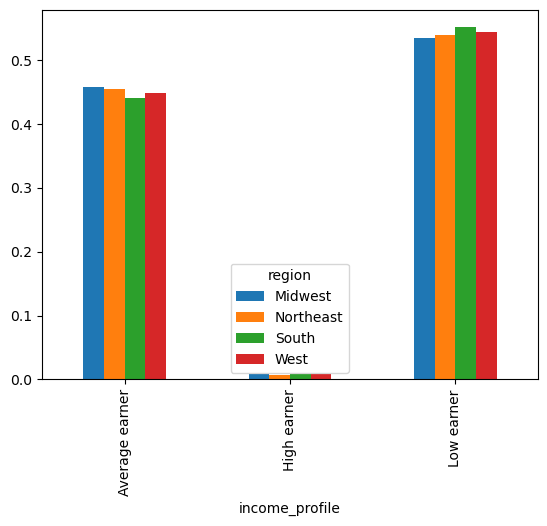

In [66]:
# Create a bar chart to see the relationship
bar_income_region = income_region_crosstab.plot.bar()

In [67]:
# export income_region bar
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income & Region.png'))

## Diet

In [68]:
# Create a crosstab to compare diet flag and region
diet_region_crosstab = pd.crosstab(df['diet_flag'], df['region'], normalize = 'columns')

In [69]:
diet_region_crosstab

region,Midwest,Northeast,South,West
diet_flag,,,,
Meat-eater,0.729649,0.731876,0.733231,0.733112
Vegan,0.012202,0.012376,0.011870,0.012246
Vegetarian,0.258149,0.255748,0.254899,0.254642


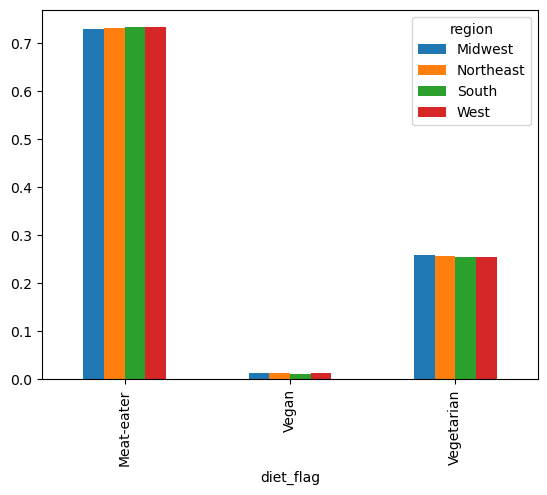

In [70]:
bar_diet_region = diet_region_crosstab.plot.bar()

In [71]:
# export diet_region bar
bar_diet_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Diet & Region.png'))

## Kids

In [72]:
# Create a crosstab to compare family status and region
family_region_crosstab = pd.crosstab(df['kids'], df['region'], normalize = 'columns')

In [73]:
family_region_crosstab

region,Midwest,Northeast,South,West
kids,,,,
Has kids,0.749225,0.751927,0.749227,0.750762
No kids,0.250775,0.248073,0.250773,0.249238


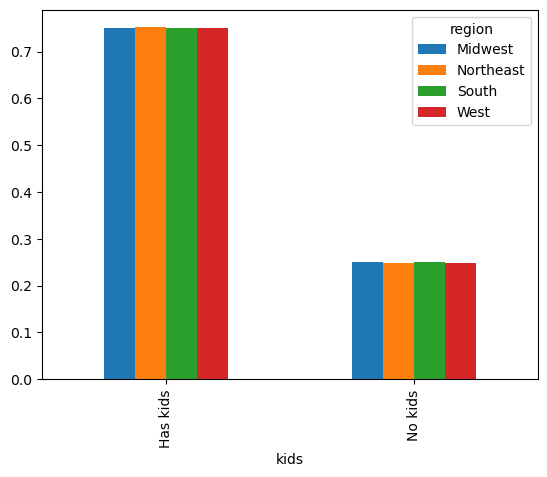

In [74]:
bar_family_region = family_region_crosstab.plot.bar()

In [75]:
# export family_region bar
bar_family_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Family status & Region.png'))

## Pets

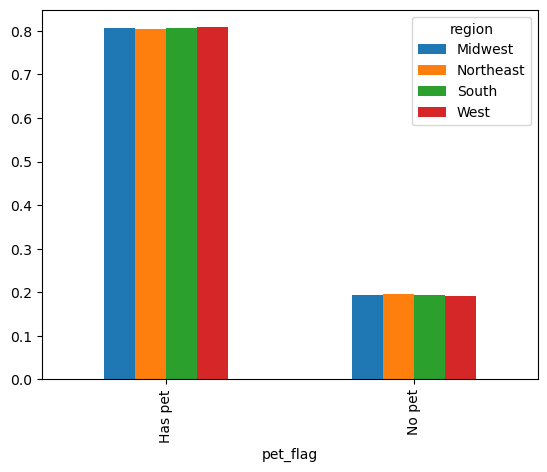

In [76]:
# Create a crosstab to compare pets and region
pets_region_crosstab = pd.crosstab(df['pet_flag'], df['region'], normalize = 'columns')
# create bar
bar_pets_region = pets_region_crosstab.plot.bar()

In [77]:
# export family_region bar
bar_pets_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Pets & Region.png'))

## Alcohol

In [78]:
# Create a crosstab to compare alcohol and region
drinking_region_crosstab = pd.crosstab(df['alcohol_flag'], df['region'], normalize = 'columns')

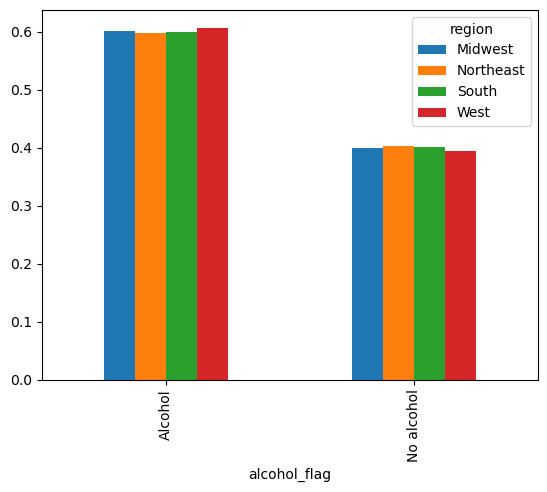

In [79]:
# create bar
bar_drinking_region = drinking_region_crosstab.plot.bar()

In [80]:
# export family_region bar
bar_drinking_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Alcohol & Region.png'))

## Conclusion
The behaviour between the different group profiles of: age, income, diet, kids, pets & drinking across the regions in the USA is only marginally different.

## P II: Profiles vs Departments

In [81]:
df['department'] = df['department_id'].map(df_dep.set_index('department_id')['department'])

## Age

In [82]:
# Create a crosstab to compare age profile and department
age_dept_crosstab =  pd.crosstab(index = df['department'], columns = df['Age_profile'], normalize = 'index')

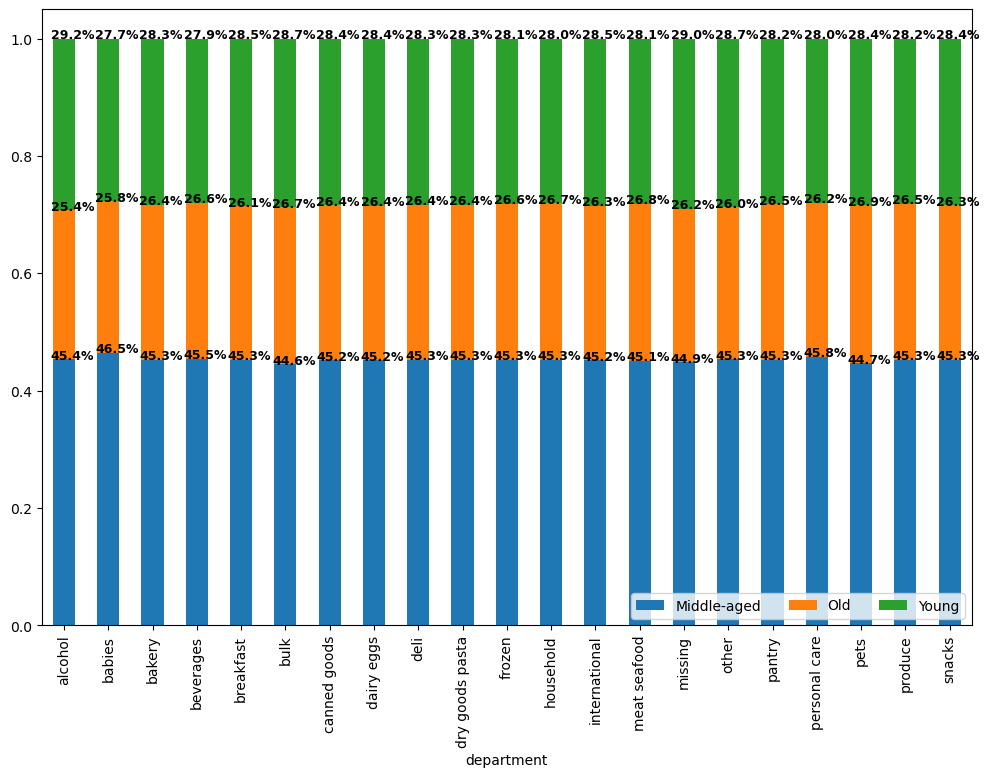

In [83]:
#Create a bar chart to visualize the relationship between age profile and departments

bar_age_department = age_dept_crosstab.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*age_dept_crosstab.index.values]):
    for (proportion, y_loc) in zip(age_dept_crosstab.loc[x], age_dept_crosstab.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [84]:
# export age_dept bar
bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age & Dept.png'))

## Income

In [85]:
# Create a crosstab to compare income profile and department id
income_dept_crosstab =  pd.crosstab(index = df['department'], columns = df['income_profile'], normalize = 'index')

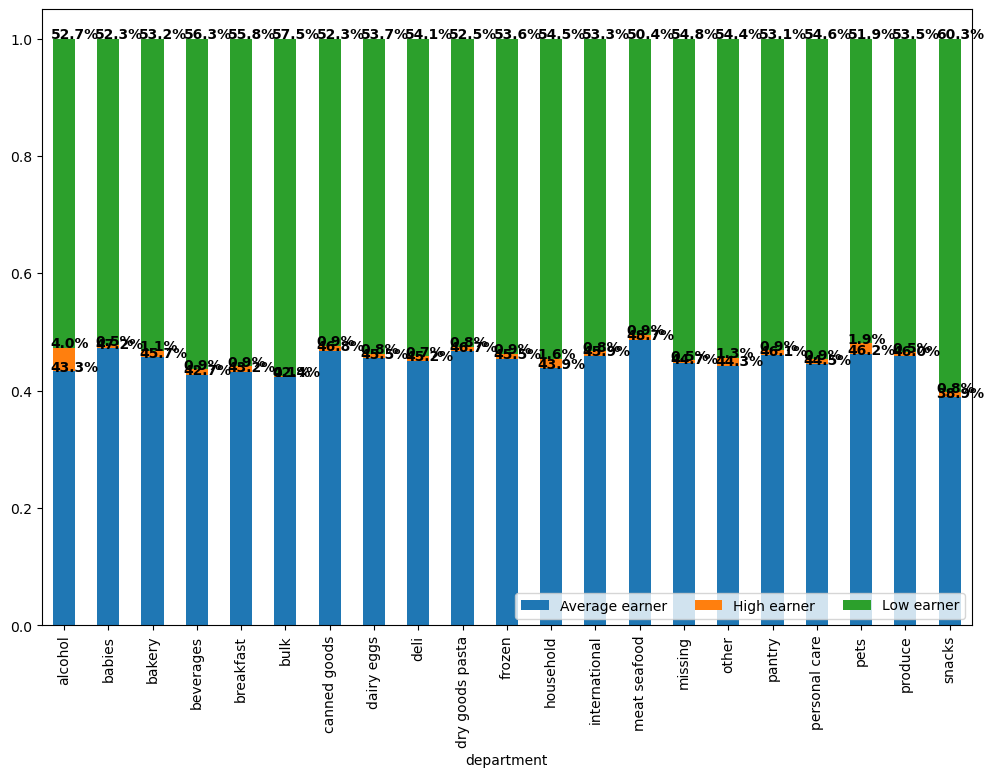

<Figure size 640x480 with 0 Axes>

In [86]:
#Create a bar chart to visualize the relation between income profile and departments

bar_income_dept = income_dept_crosstab.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*income_dept_crosstab.index.values]):
    for (proportion, y_loc) in zip(income_dept_crosstab.loc[x],
                                   income_dept_crosstab.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 10,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [88]:
# export income & dept bar
bar_income_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income & Dept.png')) 

## Diet

In [89]:
# Create a crosstab to compare diet profile and department id

diet_dept_crosstab =  pd.crosstab(index = df['department'], columns = df['diet_flag'], normalize = 'index')

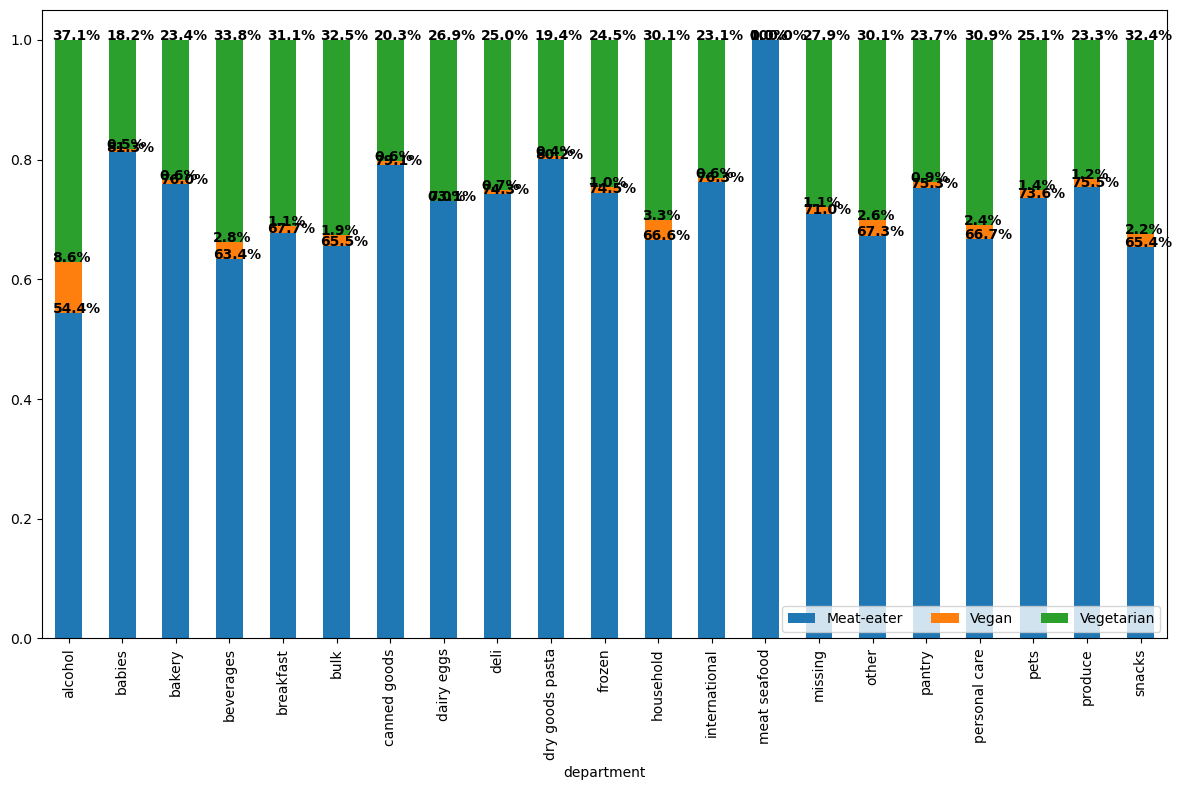

In [90]:
#Create a bar chart to visualize the relation between diet profile and departments

bar_diet_dept = diet_dept_crosstab.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*diet_dept_crosstab.index.values]):
    for (proportion, y_loc) in zip(diet_dept_crosstab.loc[x],
                                   diet_dept_crosstab.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 10,
                 fontweight = 'bold')


plt.tight_layout()

In [91]:
# export diet & dept bar
bar_diet_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Diet & Dept.png'))

## Pets

In [92]:
# Create a crosstab to compare pet profile and department id
pet_dept_cross =  pd.crosstab(index = df['department'], columns = df['pet_flag'], normalize = 'index')

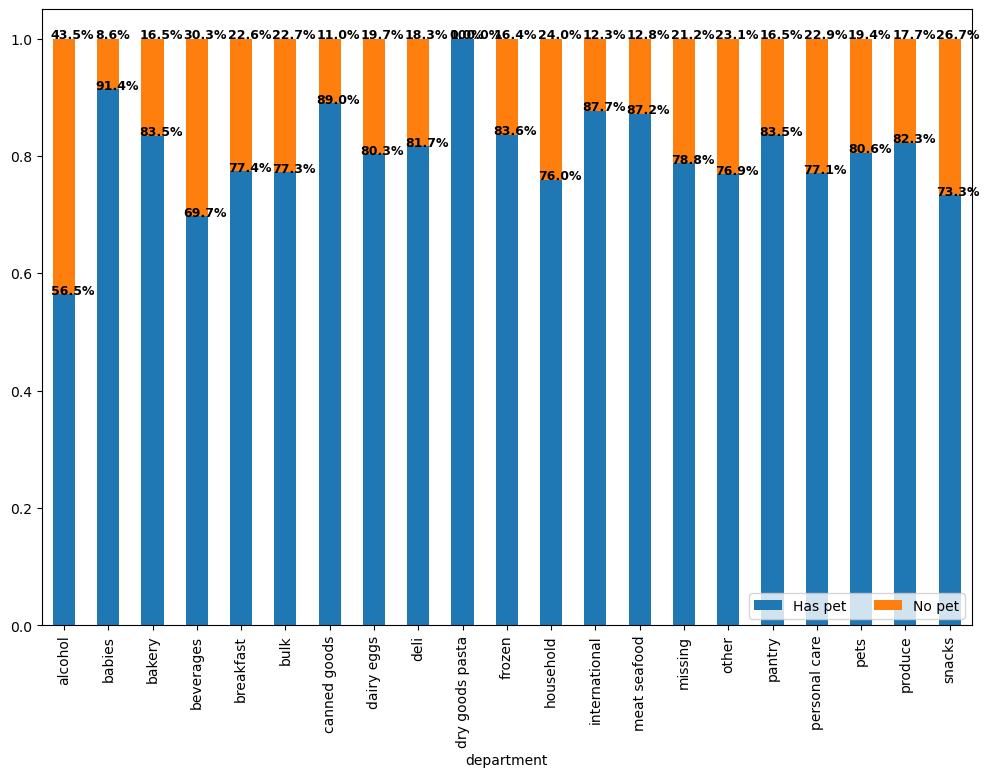

<Figure size 640x480 with 0 Axes>

In [93]:
#Create a bar chart to visualize the relation between pet profile and departments

bar_pet_dept = pet_dept_cross.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*pet_dept_cross.index.values]):
    for (proportion, y_loc) in zip(pet_dept_cross.loc[x], pet_dept_cross.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [94]:
# export pet status & dept bar
bar_pet_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Pet status & Dept.png'))

## Drinking

In [95]:
# Create a crosstab to compare alcohol profile and department id
alcohol_dept_cross =  pd.crosstab(index = df['department'], columns = df['alcohol_flag'], normalize = 'index')

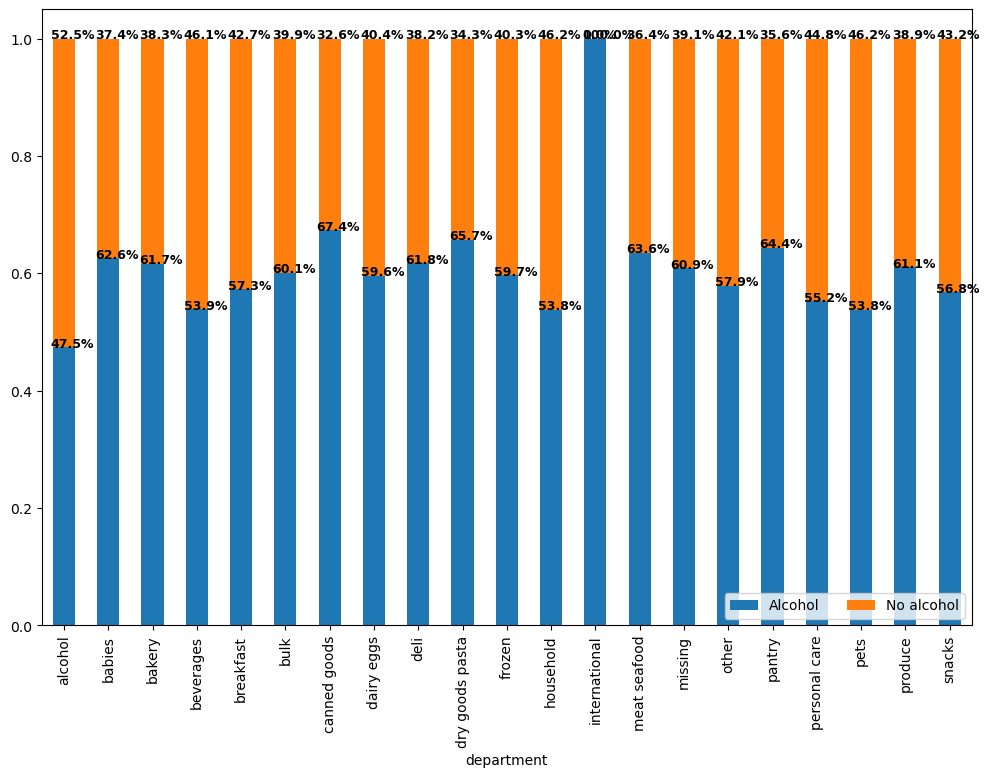

<Figure size 640x480 with 0 Axes>

In [97]:
#Create a bar chart to visualize the relation between alcohol profile and departments

bar_drinking_dept = alcohol_dept_cross.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*alcohol_dept_cross.index.values]):
    for (proportion, y_loc) in zip(alcohol_dept_cross.loc[x], alcohol_dept_cross.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [98]:
# export drinking status & dept bar
bar_drinking_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Drinking & Dept.png'))


### create a bar that shows the relationship between order time and department goods.

In [99]:
# create a crosstab 
loyalty_dept_cross = pd.crosstab(index = df['department'], columns = df['loyalty_flag'], normalize = 'index')

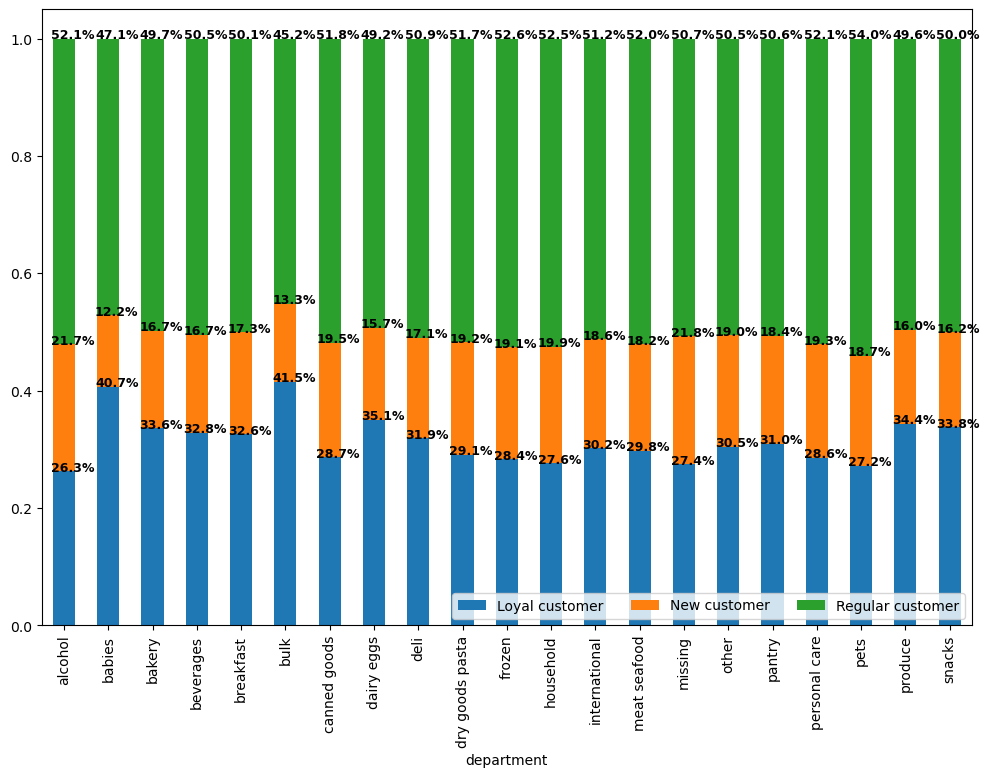

<Figure size 640x480 with 0 Axes>

In [100]:
#Create a bar chart

bar_loyalty_dept = loyalty_dept_cross.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*loyalty_dept_cross.index.values]):
    for (proportion, y_loc) in zip(loyalty_dept_cross.loc[x], loyalty_dept_cross.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [101]:
#export visualisation as png
bar_loyalty_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Loyalty & dept.png'))

### Q: Are there certain types of products that are more popular than others?

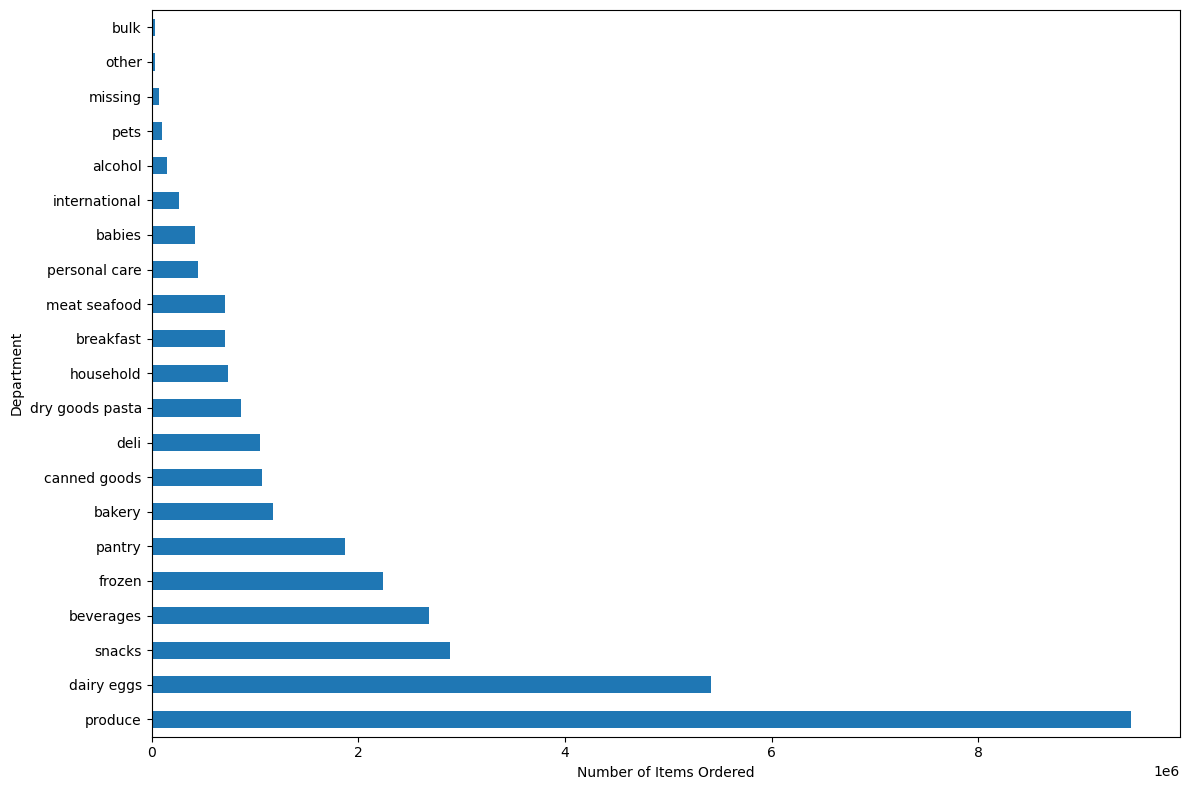

In [102]:
bar_department = df['department'].value_counts().plot.barh(figsize = (12,8))
plt.xlabel('Number of Items Ordered')
plt.ylabel('Department')
plt.tight_layout()

In [103]:
# Save the visualization
bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Dept performance.png'))

## Price density

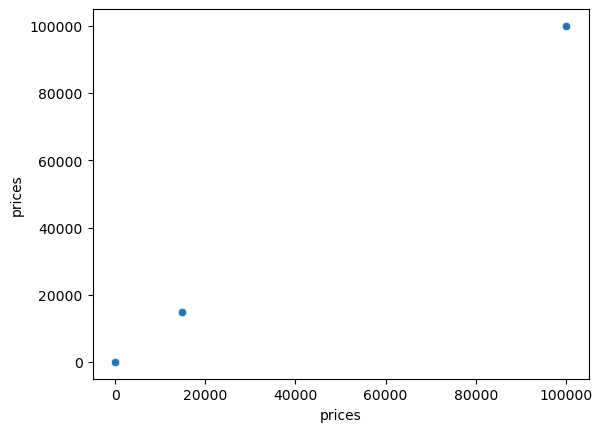

In [104]:
# create a scatterplot to investigate data spread & density. 
bar_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df)